**Linear Regression ML Boston Housing Price Dataset**

**Sohini Mukherjee**

**29.03.2021**

**Loading libraries**

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from sklearn import metrics
%matplotlib inline

**Loading Boston Housing Price Dataset**

In [14]:
boston = load_boston()

**Checking the data**

In [15]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [16]:
print(boston['feature_names'])

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [19]:
X = boston.data
print(X.shape)

(506, 13)


In [21]:
y = boston.target
print(y.shape)

(506,)


**Converting into Dataframe**

In [23]:
boston = pd.DataFrame(boston.data, columns= boston.feature_names)

In [24]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


**MEDV is missing from the dataset. Creating new column.**

In [27]:
boston['MEDV'] = y  #y contains the target values of boston dataset

**Checking Missing Values**

In [32]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

**Plotting a Distribution Plot**

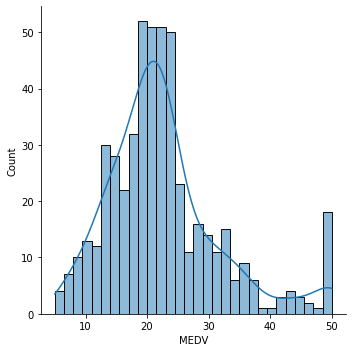

In [31]:
plt.rcParams["patch.force_edgecolor"] = True
sns.displot(boston['MEDV'], kde= True, bins=30)

**The MEDV data is normally distributed with a few outliers.**

In [35]:
boston.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


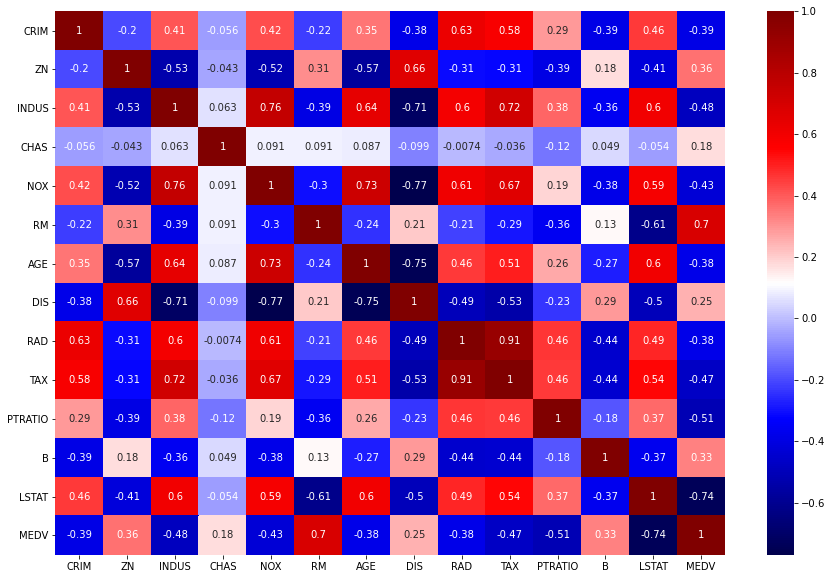

In [42]:
plt.figure(figsize=(15,10))
sns.heatmap(boston.corr(), annot=True, cmap= 'seismic')
plt.show()

**To fit a Regression Model we select the feature that has high Correlation Value. From the correlation matrix we can see that RM has a strong positive correlation with MEDV (0.7), where as LSTAT has a high negative correlation with MEDV(-0.74).**

**While selecting features for a linear regression model we check for multi-co-linearity. The features RAD, TAX have a correlation of 0.91. These feature pairs are strongly correlated to each other. We should not select both these features together for training the model. Same goes for the features DIS and AGE which have a correlation of -0.75.**

**Based on the above observations we will RM and LSTAT as our features. Using a scatter plot let’s see how these features vary with MEDV.**

In [44]:
#features to train
X = boston[['RM', 'LSTAT']]

In [46]:
#feature to predict
y = boston['MEDV']

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

**Using Linear Regression and training set**

In [66]:
lm= LinearRegression()

In [67]:
lm.fit(X_train, y_train)

LinearRegression()

**Checking Intercepts and Coefficients**

In [68]:
lm.intercept_

-0.6726621207092123

In [69]:
lm.coef_

array([ 4.87252709, -0.58585259])

**Making a Dataframe with columns and Coefficients**

In [70]:
df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

In [71]:
df.head()

,Coefficient
RM,4.872527
LSTAT,-0.585853


**Predictions**

In [122]:
predictions = lm.predict(X_test)

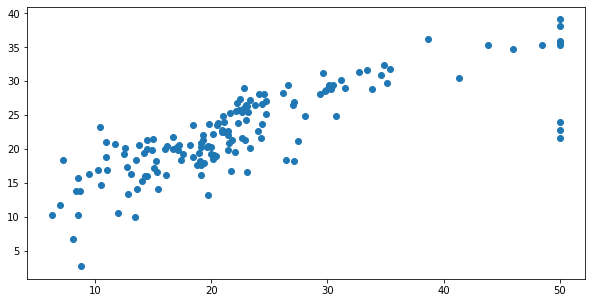

In [123]:
plt.figure(figsize=(10,5))
plt.scatter(y_test, predictions)

**Scatter plot resembles a Straight Line with a few Outliers**

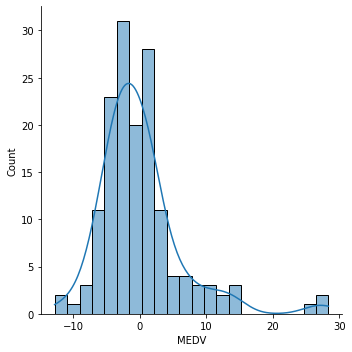

In [74]:
#histogram of residuals
sns.displot((y_test-predictions),kde=True)

**The residuals data is normally distributed with a few outliers. so the model choice is correct**

In [76]:
metrics.mean_absolute_error(y_test, predictions)

4.220033478324288

In [77]:
#root mean squared error
np.sqrt(metrics.mean_absolute_error(y_test, predictions))

2.054272006897891